Calculating moving averages for each company:

In [5]:
import pandas as pd

# Read the CSV file
data = pd.read_csv('social_media_2012_2022.csv')

# Convert the 'Date' column to datetime if it's not already in the correct format
data['Date'] = pd.to_datetime(data['Date'])

# Sort the data by date (optional)
data = data.sort_values('Date')

# Calculate moving averages for each symbol
data['50-day Moving Average'] = data.groupby('Symbol')['Adj Close'].rolling(window=50).mean().reset_index(level=0, drop=True)

# Print the updated data with moving averages
print(data)

           Date Symbol   Adj Close       Close        High         Low  \
0    2012-05-18     FB   38.230000   38.230000   45.000000   38.000000   
1    2012-05-21     FB   34.029999   34.029999   36.660000   33.000000   
2    2012-05-22     FB   31.000000   31.000000   33.590000   30.940001   
3    2012-05-23     FB   32.000000   32.000000   32.500000   31.360001   
4    2012-05-24     FB   33.029999   33.029999   33.209999   31.770000   
...         ...    ...         ...         ...         ...         ...   
8396 2022-04-06   SNAP   36.470001   36.470001   37.740002   35.639999   
8393 2022-04-06     FB  223.300003  223.300003  228.990005  221.410004   
8394 2022-04-06   TWTR   50.770000   50.770000   52.869999   49.299999   
8395 2022-04-06   PINS   24.440001   24.440001   25.559999   23.870001   
8397 2022-04-06   ETSY  125.470001  125.470001  128.229996  121.389999   

            Open       Volume  50-day Moving Average  
0      42.049999  573576400.0                    NaN  
1

Linear regression analysis on the data to explore relationships between data points. Close and adj close as dependent variables and the others as independent ones. Now we will see if there is any correlation.

In [10]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



list_column_names = list(data.columns)

print(list_column_names)

X = data[['High', 'Low', 'Open', 'Volume']]  # Independent variables
y = data['Adj Close']  # Dependent variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
model_score = model.score(X_test, y_test)

# Print the coefficient and intercept
print('Coefficient:', model.coef_)
print('Intercept:', model.intercept_)
print('R-squared score:', model_score)

['Date', 'Symbol', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
Coefficient: [ 7.89604274e-01  7.73959394e-01 -5.63720191e-01 -1.22463406e-09]
Intercept: 0.04913330239880054
R-squared score: 0.9998408407318448


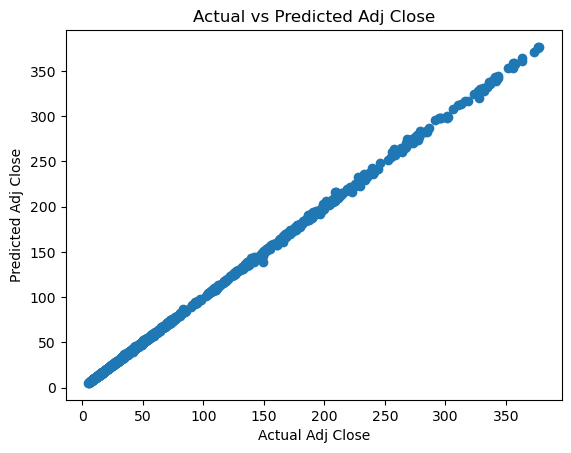

In [11]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Adj Close')
plt.ylabel('Predicted Adj Close')
plt.title('Actual vs Predicted Adj Close')
plt.show()

 significance of a scatter plot lies in its ability to visually display the relationship between two variables. In the context of data analysis, a scatter plot is particularly useful for understanding the correlation or association between two numerical variables.

Scatter plots also give you a sense of the data distribution across the two variables. You can observe the spread of the data points along the x-axis and y-axis, helping you understand the range and concentration of values.

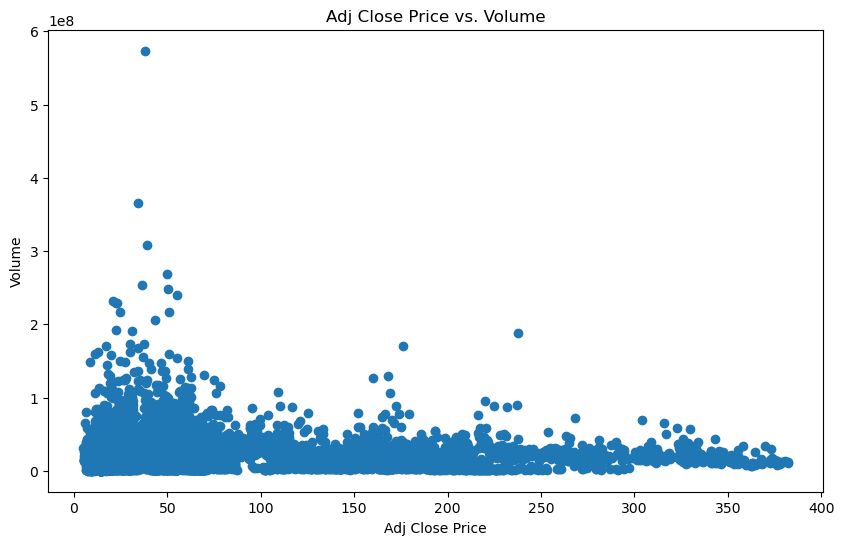

In [4]:
import matplotlib.pyplot as plt

import pandas as pd

# Read the CSV file
data = pd.read_csv('social_media_2012_2022.csv')

# Convert the 'Date' column to datetime if it's not already in the correct format
data['Date'] = pd.to_datetime(data['Date'])

# Sort the data by date (optional)
data = data.sort_values('Date')
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Adj Close'], data['Volume'])
plt.title('Adj Close Price vs. Volume')
plt.xlabel('Adj Close Price')
plt.ylabel('Volume')
plt.show()

Now that we have the graph we can calculate for the actual correalation value to see if these 2 variables have a strong or weak coorelation

In [5]:
correlation = data['Adj Close'].corr(data['Volume'])
print('Correlation:', correlation)

Correlation: -0.03911640553103546


A value that is close to 0, means that there is quite weak correaltion. The closer a value is to 1 or -1 means there is either strong positive correlation or strong negative correlation